[2, 3, 5, 10, 30, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]
[0.05679330002749339, 0.038011400029063225, 0.048616699990816414, 0.051827099989168346, 0.07091050001326948, 0.10262190000503324, 0.1452030999935232, 0.3758769999840297, 0.7021667999797501, 1.103978700004518, 1.615799600025639, 2.351525900012348, 3.1033001000178047, 4.203019100008532, 5.099897800013423, 6.2312293000286445, 7.450460399966687, 8.745294799969997, 10.657877999998163, 12.67952459998196, 16.462696500006132, 16.43752720003249, 22.557530599995516, 24.11913020000793, 29.72031830000924, 28.621278400009032]
[0.0004216000088490546, 0.00047670002095401287, 0.0009285000269301236, 0.0014121999847702682, 0.006392200011759996, 0.007922699995106086, 0.0986393999774009, 0.0348431000020355, 0.05741100001614541, 0.07865229999879375, 0.10955499997362494, 0.2173274999950081, 0.18474580004112795, 0.23037800000747666, 0.2680875000078231, 0.30207710003014654, 0.34

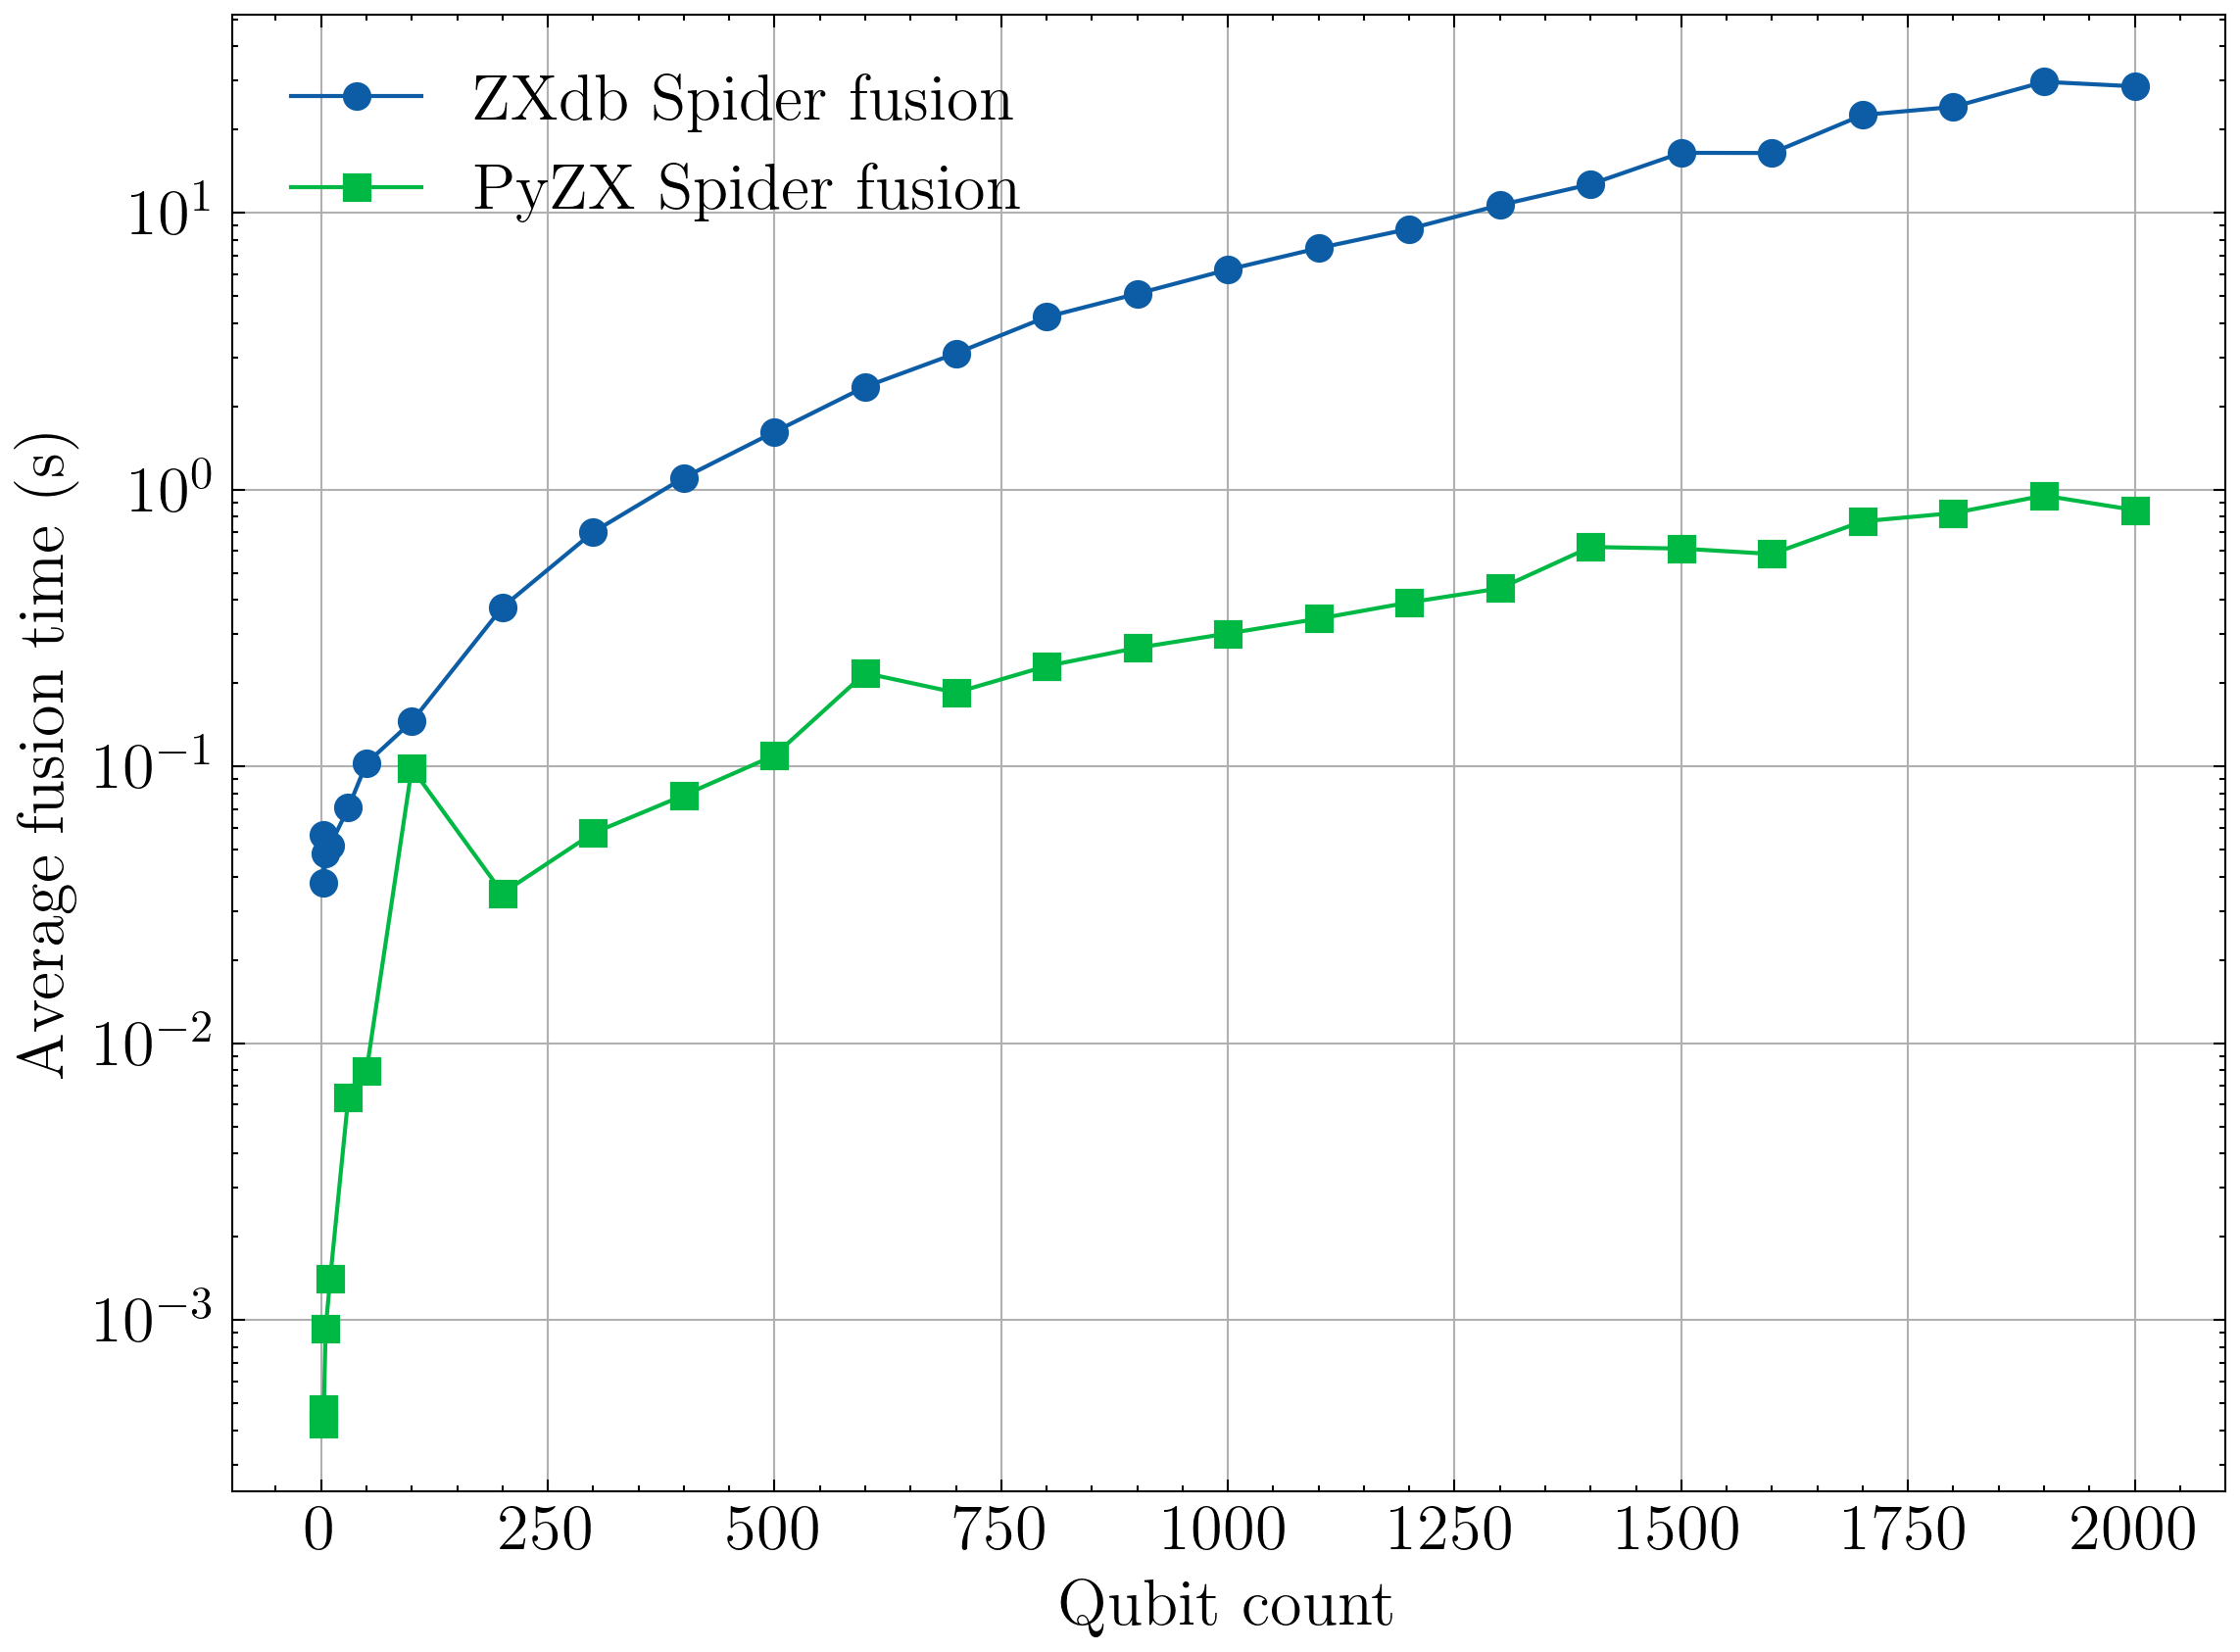

In [1]:
import os
import json
import matplotlib.pyplot as plt
import scienceplots
from collections import defaultdict

plt.style.use('science')
plt.rcParams.update({
    "font.size": 16,
    "axes.labelsize": 16,
    "axes.titlesize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "figure.dpi": 300,
})

# Path to your experiment folder
rules = ["spider_fusion", "bialgebra_simp", "pivot_boundary", "pivot_gadget_rule", "pivot", "phase_gadget_fusion"]
name_in_legends = ["Spider fusion", "Bialgebra simplification", "Pivot boundary", "Pivot gadget", "Pivot", "Phase gadget fusion"]
index = 0  # Change this index to switch between rules
rule = rules[index]
name_in_legend = name_in_legends[index]
folder = rule

# Collect results
results = defaultdict(lambda: {'db': [], 'pyzx': []})

for fname in os.listdir(folder):
    if fname.endswith('.json'):
        with open(os.path.join(folder, fname), 'r') as f:
            data = json.load(f)
            qubits = data.get('qubits')
            db_time = data.get(f'db_{rule}_time')
            pyzx_time = data.get(f'pyzx_{rule}_time')
            if qubits is not None and db_time is not None and pyzx_time is not None:
                results[qubits]['db'].append(db_time)
                results[qubits]['pyzx'].append(pyzx_time)

# Prepare data for plotting
qubit_counts = sorted(results.keys())
db_times = [sum(results[q]['db'])/len(results[q]['db']) for q in qubit_counts]
pyzx_times = [sum(results[q]['pyzx'])/len(results[q]['pyzx']) for q in qubit_counts]

print(qubit_counts)
print(db_times)
print(pyzx_times)

# Plot
plt.figure(figsize=(8,6))
plt.plot(qubit_counts, db_times, 'o-', label=f'ZXdb {name_in_legend}')
plt.plot(qubit_counts, pyzx_times, 's-', label=f'PyZX {name_in_legend}')
plt.xlabel('Qubit count')
plt.ylabel('Average fusion time (s)')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [2]:
def tikz_plot_two_series(x, y1, y2, xlabel="Input Size", ylabel="Value", 
                         legend1="Series 1", legend2="Series 2", title=None,
                         ymode=None):
    """
    Generate an academically professional TikZ/PGFPlots snippet for two datasets.

    Parameters
    ----------
    x : list of float
        X-axis data.
    y1 : list of float
        First dataset values.
    y2 : list of float
        Second dataset values.
    xlabel : str
        Label for x-axis.
    ylabel : str
        Label for y-axis.
    legend1 : str
        Legend entry for first dataset.
    legend2 : str
        Legend entry for second dataset.
    title : str, optional
        Title for the plot.
    ymode : str, optional
        'log' for logarithmic y-axis, otherwise linear.
    """
    header = [
        "\\begin{tikzpicture}",
        "  \\begin{axis}[",
        "    width=10cm,",
        "    height=6cm,",
        f"    xlabel={{{xlabel}}},",
        f"    ylabel={{{ylabel}}},",
        "    grid=both,",
        "    grid style={line width=.1pt, draw=gray!30},",
        "    major grid style={line width=.2pt,draw=gray!60},",
        "    minor tick num=1,",
        "    legend style={at={(0.02,0.98)},anchor=north west, font=\\small},",
        "    every axis plot/.append style={thick},",
    ]
    
    if ymode == "log":
        header.append("    ymode=log,")
    if title:
        header.append(f"    title={{{title}}},")

    header.append("  ]")

    coords1 = "\n".join(f"({xi}, {yi})" for xi, yi in zip(x, y1))
    coords2 = "\n".join(f"({xi}, {yi})" for xi, yi in zip(x, y2))

    plot1 = (
        "    \\addplot+[mark=*, color=blue] "
        f"coordinates {{{coords1}}};\n"
        f"    \\addlegendentry{{{legend1}}}"
    )
    plot2 = (
        "    \\addplot+[mark=square*, color=red] "
        f"coordinates {{{coords2}}};\n"
        f"    \\addlegendentry{{{legend2}}}"
    )

    footer = [
        "  \\end{axis}",
        "\\end{tikzpicture}",
    ]

    return "\n".join(header + [plot1, plot2] + footer)


In [3]:
tikz_code = tikz_plot_two_series(
    qubit_counts, db_times, pyzx_times,
    xlabel="Qubit Count",
    ylabel="Average Time (s)",
    legend1="ZXdb",
    legend2="PyZX",
    title="Scaling Comparison",
    ymode="log"  # since values span several orders of magnitude
)

print(tikz_code)

\begin{tikzpicture}
  \begin{axis}[
    width=10cm,
    height=6cm,
    xlabel={Qubit Count},
    ylabel={Average Time (s)},
    grid=both,
    grid style={line width=.1pt, draw=gray!30},
    major grid style={line width=.2pt,draw=gray!60},
    minor tick num=1,
    legend style={at={(0.02,0.98)},anchor=north west, font=\small},
    every axis plot/.append style={thick},
    ymode=log,
    title={Scaling Comparison},
  ]
    \addplot+[mark=*, color=blue] coordinates {(2, 0.05679330002749339)
(3, 0.038011400029063225)
(5, 0.048616699990816414)
(10, 0.051827099989168346)
(30, 0.07091050001326948)
(50, 0.10262190000503324)
(100, 0.1452030999935232)
(200, 0.3758769999840297)
(300, 0.7021667999797501)
(400, 1.103978700004518)
(500, 1.615799600025639)
(600, 2.351525900012348)
(700, 3.1033001000178047)
(800, 4.203019100008532)
(900, 5.099897800013423)
(1000, 6.2312293000286445)
(1100, 7.450460399966687)
(1200, 8.745294799969997)
(1300, 10.657877999998163)
(1400, 12.67952459998196)
(1500, 16.4